In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
name = "Neighbour"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in Data dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [4]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Best-Pars")
# gaia_dir = join(root_data_dir, "Gaia-2MASS")
files = glob(join(gaia_dir, "gaia*.hdf5"))
files.sort()
files[:5]
# files

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

In [5]:
len(files)

360

In [6]:
# raw = vaex.open_many(files[250:310])
raw = vaex.open_many(files)
raw
# 7,523,276	

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,303.27634091220216,-28.469529127008617,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,F,--,33.83838653564453,3.4127907752990723,gaia,6146.64794921875,13.3173828125,13.89794921875,0.0,gspphot,4.204100131988525,0.007100105285644531,0.0067996978759765625,0.0,gspphot,-0.5670999884605408,0.014299988746643066,0.01569998264312744,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [7]:
# cols = ["source_id", "parallax", "Jmag", "Kmag", "rv", "e_rv", "rv_cat", "pmra", "e_pmra", "pmdec", "e_pmdec", "ra", "dec", "GLON", "GLAT", ]
# data = combine[cols]
data = raw
data["JK"] = data["Jmag"] - data["Kmag"]
data["M_J"] = data["Jmag"] -10 - 5*np.log10(1/data["parallax"])
data["Dist"] = 1000/data["parallax"]
data["z"] = data["Dist"]*np.sin(data["GLAT"]*np.pi/180)
data["r"] = np.sqrt(data["Dist"]**2-data["z"]**2)
data["ra"] = data["ra"]*np.pi/180
data["dec"] = data["dec"]*np.pi/180
data["GLON"] = data["GLON"]*np.pi/180 - np.pi
data["GLAT"] = data["GLAT"]*np.pi/180
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r
0,0.0031502843932647248,-1.5575987578565538,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,2.1488407759485444,-0.4863503489604674,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.44400024,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239
1,0.005902302104516865,-1.561738643935699,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,2.1477832341095375,-0.48231754545054356,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,0.9390001,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336
2,0.006857293911330601,-1.558344711578856,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,2.148604625108237,-0.4856329889900298,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.43900013,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063
3,0.008571259596666592,-1.5590214280897319,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,2.148417184534562,-0.48497704043229073,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.36299992,3.088061577365918,1094.9332745959175,-510.44480550483127,968.671758827764
4,0.0024607048058017653,-1.5467900559720005,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,2.1515780387289176,-0.49688701975872723,858.9404,850.0156,867.84,0.2

In [8]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180 

C1 = np.sin(delta_G)*np.cos(data.dec) - np.cos(delta_G)*np.sin(data.dec)*np.cos(data.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(data.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

data["pmlon"] = 1/cosb*(C1*data.pmra+C2*data.pmdec)
data["pmlat"] = 1/cosb*(-1*C2*data.pmra+C1*data.pmdec)
data["e_pmlon"] = 1/cosb*np.sqrt((C1*data.e_pmra)**2 + (C2*data.e_pmdec)**2)
data["e_pmlat"] = 1/cosb*np.sqrt((C2*data.e_pmra)**2 + (C1*data.e_pmdec)**2)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat
0,0.0031502843932647248,-1.5575987578565538,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,2.1488407759485444,-0.4863503489604674,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.44400024,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566
1,0.005902302104516865,-1.561738643935699,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,2.1477832341095375,-0.48231754545054356,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,0.9390001,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345
2,0.006857293911330601,-1.558344711578856,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,2.148604625108237,-0.4856329889900298,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.43900013,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885
3,0.008571259596666592,-1.5590214280897319,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,2.148417184534562,-0.48497704043229073,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.36299992,3.088061577365918,1094.9332745959175,-510.44480550483127,968.671758827764,-2.2892465928776473,-2.425821827854096,0.01596413547582

In [9]:
# calculate vertical velocities and their errors
data['vb'] = 4.74*data["pmlat"]/data["parallax"]
data["vphi"] = 4.74*data["pmlon"]/data["parallax"]
data["e_vb"] = data['vb']*np.sqrt((data["e_pmlat"]/data["pmlat"])**2 + (data["e_parallax"]/data["parallax"])**2)
data["e_vphi"] = data['vphi']*np.sqrt((data["e_pmlon"]/data["pmlon"])**2 + (data["e_parallax"]/data["parallax"])**2)

data["w"] = data["vb"]*np.cos(data.GLAT) + data["rv"]*np.sin(data.GLAT)
data["e_w"] = np.sqrt(data["e_vb"]**2*np.cos(data.GLAT)**2 + data["e_rv"]**2*np.sin(data.GLAT)**2)
data["v_xy"] = data["rv"]*np.cos(data.GLAT) - data["vb"]*np.sin(data.GLAT)
data["e_v_xy"] = np.sqrt(data["e_rv"]**2*np.cos(data.GLAT)**2 + data["e_vb"]**2*np.sin(data.GLAT)**2)
data["v"] = data["vphi"]*np.sin(data.GLON) + data["v_xy"]*np.cos(data.GLON)
data["e_v"] = np.sqrt(data["e_vphi"]**2*np.sin(data.GLON)**2 + data["e_v_xy"]**2*np.cos(data.GLON)**2)
data["u"] = data["vphi"]*np.cos(data.GLON) - data["v_xy"]*np.sin(data.GLON)
data["e_u"] = np.sqrt(data["e_vphi"]**2*np.cos(data.GLON)**2 + data["e_v_xy"]**2*np.sin(data.GLON)**2)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.0031502843932647248,-1.5575987578565538,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,2.1488407759485444,-0.4863503489604674,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.44400024,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239,-18.576706336880726,2.289256649946772,0.01767203865874714,0.01807885998730566,6.985002399575403,-56.6814290317062,0.0922722786472553,-0.6026486842240635,-65.26497617067683,2.3007791600009417,138.38638990461146,4.349168701739516,-123.0850969280631,2.429342317816707,-84.93312794261618,3.6574239206923407
1,0.005902302104516865,-1.561738643935699,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,2.1477832341095375,-0.48231754545054356,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,0.9390001,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336,-8.709490068351284,4.090165517474604,0.014369985255278503,0.014541850270109345,23.43181139757744,-49.89507827465279,0.3684630613224153,-0.7686994645342724,6.723306071255331,0.3355825074628578,37.676194391475576,0.2265251267681411,-62.36997489944363,0.6559982457411133,-4.358978194572231,0.46030294526233645
2,0.006857293911330601,-1.558344711578856,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,2.148604625108237,-0.4856329889900298,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.43900013,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063,-5.842638267897713,3.7054396853300493,0.015629062367430852,0.016642345850951885,11.772665565828497,-18.56282443953601,0.13018132374433616,-0.19403385618482055,6.5436264643227116,3.0430900755124,12.823527094503625,5.761895270058083,-22.553441780916923,3.151280154382579,-0.6029611523927052,4.827682635494816
3,0.008571259596666592,-1.5590214280897319,13.285,12.922,

In [10]:
gaia = data.filter("r <= 150").filter("abs(z) <= 200")
# gaia = data.filter("Dist < 300")
# gaia = data
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0.0,0.0,1e-04,M,--,16.0080623626709,1.5245096683502197,gaia,3156.3876953125,0.260009765625,0.33251953125,0.0,gspphot,4.99630022048

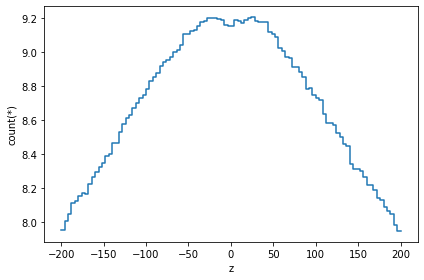

In [11]:
gaia.viz.histogram("z", limits=[-200, 200], shape=100, show=True, f="log")

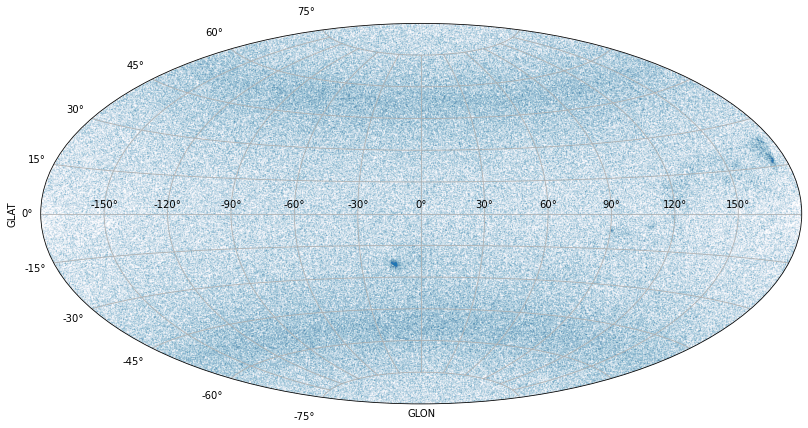

In [12]:
# sanity check
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=0.1)
plt.grid(True)
plt.show()

In [13]:
gaia.export(join(data_dir, "gaia-neighbour.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :   185.50s =  3.1m =  0.1h      
 

In [13]:
df_rv_nan = gaia[gaia.rv.isnan()]
none = len(df_rv_nan)

df_rv = gaia.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
df_rv.at[0, 'count'] = none
df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
2,apogee,27352
5,gaia,449927
1,galah,5153
4,lamost,1166
3,rave,3030
0,None,161435


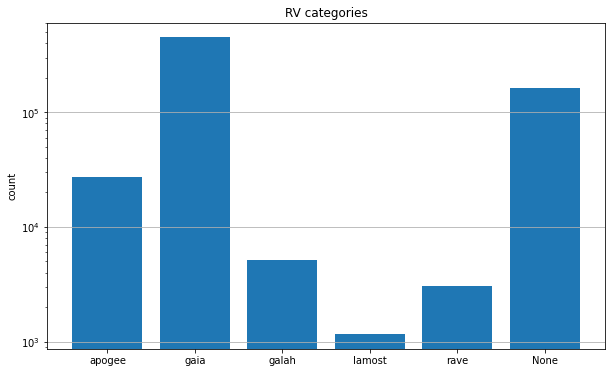

In [14]:
x = df_rv['rv_cat'].values.astype(str)
y = df_rv['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()
fig.savefig('rv_cat.pdf')

In [15]:
df_teff_nan = gaia[gaia.teff.isnan()]
none = len(df_teff_nan)

df_teff = gaia.groupby('teff_cat', agg={'count': vaex.agg.count('teff_cat')})
df_teff = df_teff.to_pandas_df()
df_teff.at[0, 'count'] = none
df_teff.sort_values(by='teff_cat', ascending=True, inplace=True)
df_teff

,teff_cat,count
2,apogee,10629
1,galah,1551
3,gspphot,503099
5,lamost,3273
4,rave,2718
0,None,126793


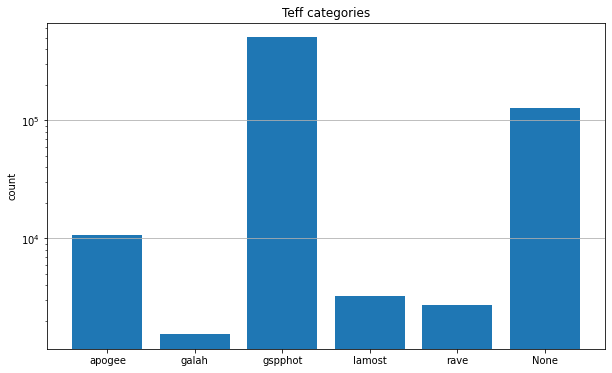

In [16]:
x = df_teff['teff_cat'].values.astype(str)
y = df_teff['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('Teff categories')
ax.yaxis.grid(True)
plt.show()

In [17]:
df_logg_nan = gaia[gaia.logg.isnan()]
none = len(df_logg_nan)

df_logg = gaia.groupby('logg_cat', agg={'count': vaex.agg.count('logg_cat')})
df_logg = df_logg.to_pandas_df()
df_logg.at[0, 'count'] = none
df_logg.sort_values(by='logg_cat', ascending=True, inplace=True)
df_logg

,logg_cat,count
2,apogee,6778
1,galah,1471
3,gspphot,509026
5,lamost,1277
4,rave,2718
0,None,126793


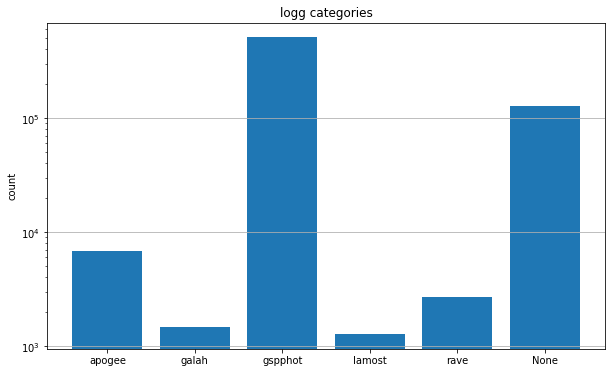

In [18]:
x = df_logg['logg_cat'].values.astype(str)
y = df_logg['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('logg categories')
ax.yaxis.grid(True)
plt.show()

In [19]:
df_feh_nan = gaia[gaia.feh.isnan()]
none = len(df_feh_nan)

df_feh = gaia.groupby('feh_cat', agg={'count': vaex.agg.count('feh_cat')})
df_feh = df_feh.to_pandas_df()
df_feh.at[0, 'count'] = none
df_feh.sort_values(by='feh_cat', ascending=True, inplace=True)
df_feh

,feh_cat,count
2,apogee,30530
1,galah,5308
3,lamost,14202
0,None,549766


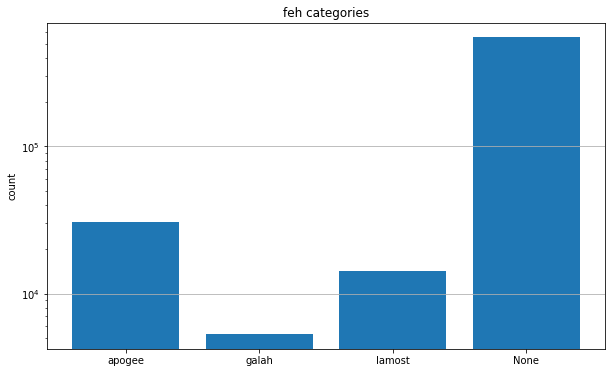

In [20]:
x = df_feh['feh_cat'].values.astype(str)
y = df_feh['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('feh categories')
ax.yaxis.grid(True)
plt.show()

In [21]:
df_mh_nan = gaia[gaia.mh.isnan()]
none = len(df_mh_nan)

df_mh = gaia.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
df_mh = df_mh.to_pandas_df()
df_mh.at[0, 'count'] = none
df_mh.sort_values(by='mh_cat', ascending=True, inplace=True)
df_mh

,mh_cat,count
2,apogee,19411
3,gspphot,475123
1,gspspec,48113
4,rave,471
0,None,104945


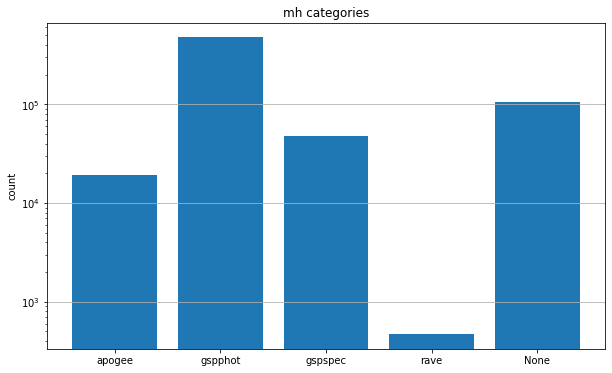

In [22]:
x = df_mh['mh_cat'].values.astype(str)
y = df_mh['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('mh categories')
ax.yaxis.grid(True)
plt.show()


In [23]:
df_alpha_nan = gaia[gaia.alphafe.isnan()]
none = len(df_alpha_nan)

df_alpha = gaia.groupby('alphafe_cat', agg={'count': vaex.agg.count('alphafe_cat')})
df_alpha = df_alpha.to_pandas_df()
df_alpha.at[0, 'count'] = none
df_alpha.sort_values(by='alphafe_cat', ascending=True, inplace=True)
df_alpha

,alphafe_cat,count
1,galah,1539
2,gspspec,203250
3,rave,3575
0,None,439699


In [24]:
gaia.export(join(data_dir, 'neighbour.hdf5'), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    21.19s =  0.4m =  0.0h  
 